<a href="https://colab.research.google.com/github/arman-hossain45/ML_Algorithm/blob/main/final_Exam_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:Mohammad Arman hossain**

**Gmail:armanhossan890@gmail.**

In [75]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import  SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#model selection

from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

**Data set load Drinkable data set prediction is water drinkable or not**

In [21]:
df=pd.read_csv("water.csv")

In [22]:
!pip install ydata-profiling

In [23]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [24]:
df.shape

(3276, 10)

In [17]:
profile = ProfileReport( df , title="water drinkable Profile", explorative = True  )

profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 51.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


# data preprocessing



In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [25]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [26]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [27]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

There is no categorical columns in this data set

In [28]:
df.select_dtypes(include=['int64','float64']).columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

*separate X and Y*

In [29]:
x=df.drop('Potability',axis=1)
y=df['Potability']

Numerical columns

In [30]:
numeric_feature=x.select_dtypes(include=['int64','float64']).columns

Correlation for numerical value

In [31]:
corr=df.select_dtypes(include=np.number).corr()['Potability'].sort_values(ascending=False)
corr

,Potability
Potability,1.000000
Solids,0.033743
Chloramines,0.023779
Trihalomethanes,0.007130
Turbidity,0.001581
ph,-0.003556
Conductivity,-0.008128
Hardness,-0.013837
Sulfate,-0.023577
Organic_carbon,-0.030001


see null values

<Axes: >

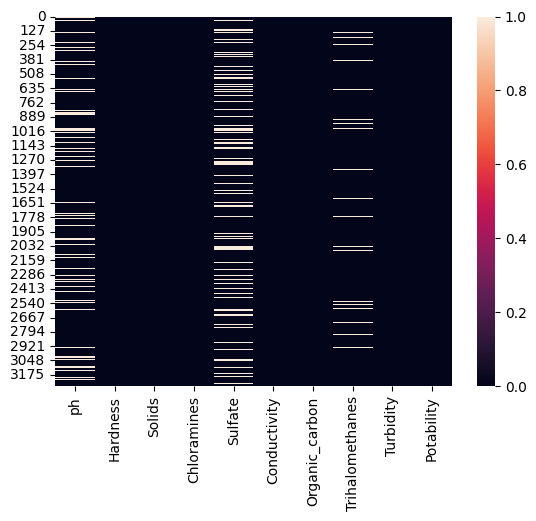

In [32]:
sns.heatmap(df.isnull())

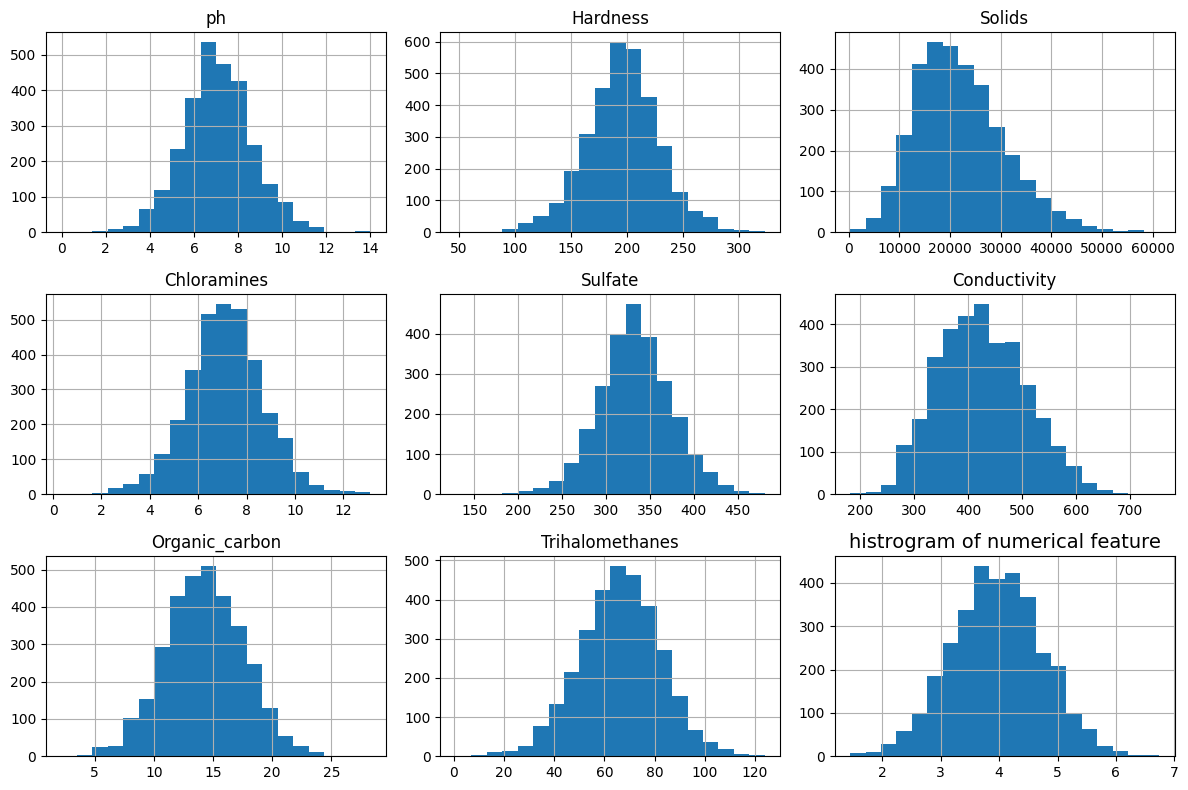

In [33]:
df[numeric_feature].hist(bins=20,figsize=(12,8))
plt.title('histrogram of numerical feature',fontsize=14)
plt.tight_layout()
plt.show()

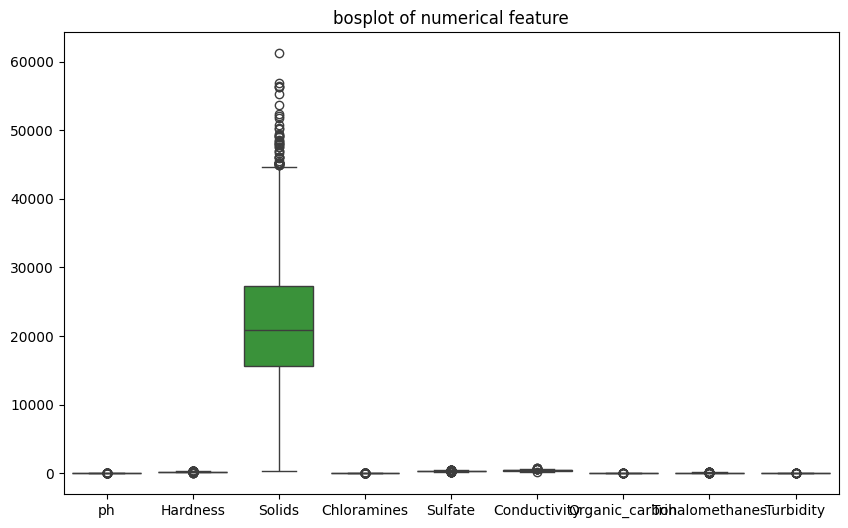

In [34]:
#see here is outliar is or not
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_feature])
plt.title('bosplot of numerical feature')
plt.show()

In [35]:
numeric_feature

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [44]:
#solid there is multiple or huge outliar we handle the outliar
col1='Solids'
q1=df[col1].quantile(0.25)
q3=df[col1].quantile(0.75)

IQR=q3-q1

lower=q1-1.5*IQR
upper=q3+1.5*IQR

outliers=df[(df[col1]<lower)|(df[col1]>upper)]
print(f"number of detected outliar is {col1}",len(outliers))

number of detected outliar is Solids 47


In [45]:
col2='Conductivity'
q1=df[col2].quantile(0.25)
q3=df[col2].quantile(0.75)

IQR=q3-q1

lower=q1-1.5*IQR
upper=q3+1.5*IQR

outliers2=df[(df[col2]<lower)|(df[col2]>upper)]
print(f"number of detected outliar is {col2}",len(outliers2))

number of detected outliar is Conductivity 11


In [46]:
col3='Sulfate'
q1=df[col3].quantile(0.25)
q3=df[col3].quantile(0.75)

IQR=q3-q1

lower=q1-1.5*IQR
upper=q3+1.5*IQR

outliers3=df[(df[col3]<lower)|(df[col3]>upper)]
print(f"number of detected outliar is {col3}",len(outliers3))

number of detected outliar is Sulfate 41


In [39]:
# here our missing value column is PH,Sulfate ,Trihalomethanes

Text(0.5, 1.0, 'Ph distribution')

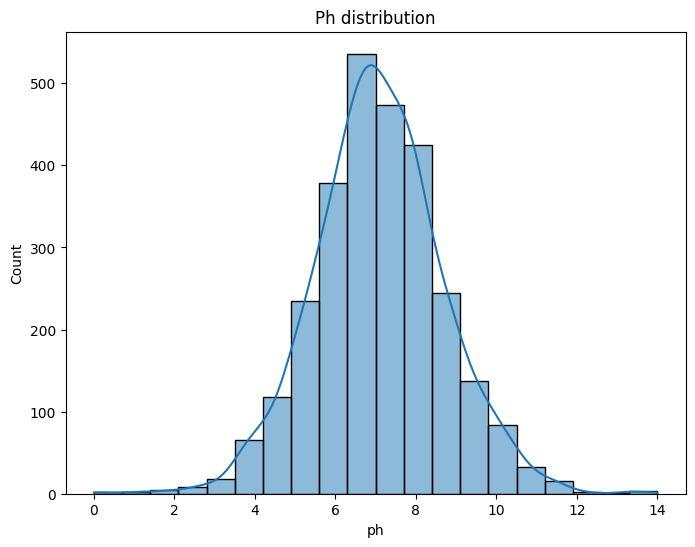

In [58]:
#plot ph
plt.figure(figsize=(8,6))
sns.histplot(df['ph'],kde=True,bins=20)
plt.title("Ph distribution")

Text(0.5, 1.0, 'Sulfate distribution')

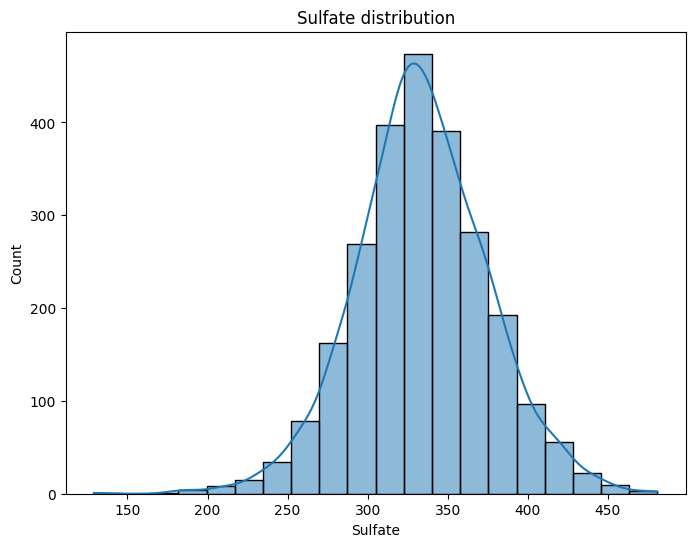

In [59]:
#plotSulfate
plt.figure(figsize=(8,6))
sns.histplot(df['Sulfate'],kde=True,bins=20)
plt.title("Sulfate distribution")

Text(0.5, 1.0, 'Sulfate distribution')

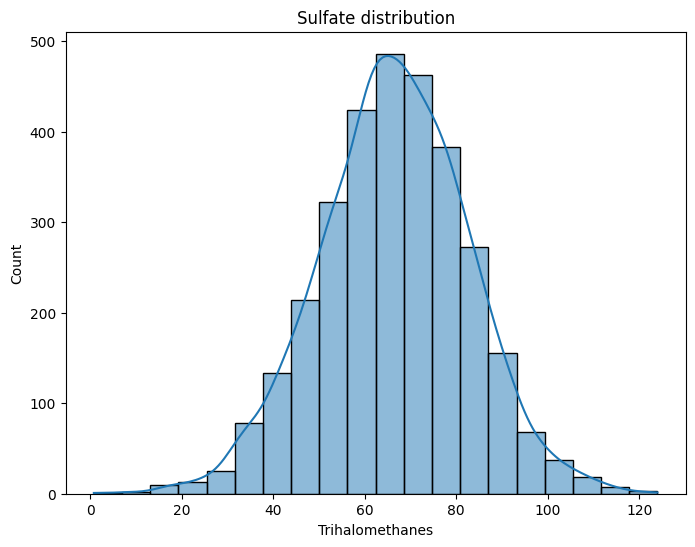

In [60]:
#plot Trihalomethanes
plt.figure(figsize=(8,6))
sns.histplot(df['Trihalomethanes'],kde=True,bins=20)
plt.title("Trihalomethanes distribution")

So we see that that this distribuition is linearly separable so we fill the missing value by using mean values

# PipeLine

In [63]:
#for numerical feature

num_transformer=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')),
        ('sacler',StandardScaler())
    ]
)

In [66]:
num_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('sacler', StandardScaler())])

In [67]:
#combine them

preprocessor=ColumnTransformer(
    transformers=[
        ("num",num_transformer,numeric_feature)
    ]
)

In [68]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('sacler', StandardScaler())]),
                                 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object'))])

In [73]:
#train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Ensemble boosting and stacking

In [93]:
#base learner

lr=LogisticRegression( max_iter=2000,
    class_weight='balanced')
dt=DecisionTreeClassifier(max_depth=5,random_state=42)
rf=RandomForestClassifier(   n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1)
knn=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)
svm=SVC(kernel='linear',C=0.1,random_state=42)
gb=GradientBoostingClassifier( n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42)

In [94]:
# Voting classificatiom
voting_class=VotingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('rf',rf),
        ('knn',knn),
        ('svm',svm),
        ('gb',gb)
    ],
    voting='hard'

)

In [95]:
#stacking classification

stacking_class=StackingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('rf',rf),
        ('knn',knn),
        ('svm',svm),
        ('gb',gb)
    ],
    final_estimator=RidgeClassifier()

)


In [96]:
#model traing

model_to_train={
    'Linear Regression' : lr,
    'Decision Tree' :dt,
    'Random Forest' : rf,
    'Knn' :knn,
    'SVM' :svm,
    'Gradient Boosting' :gb,
    'Voting classifier' :voting_class,
    'Stacking classifier' :stacking_class

}

In [97]:
# taring and evaluation

result=[]
for model_name,model in model_to_train.items():
  #create full pipe line with preprocessor
  pipe=Pipeline([
      ("preprocessor",preprocessor),
      ("model",model)
  ]

  )
  #train the model
  pipe.fit(x_train,y_train)
  #predict

  y_pred=pipe.predict(x_test)
  #evatute
  accuracy=accuracy_score(y_test,y_pred)

  result.append(
      {
          "Model" :model_name,
          "Accuracy" :accuracy
      }
  )
result_df=pd.DataFrame(result).sort_values(by="Accuracy",ascending=False)

print(result_df)



                 Model  Accuracy
2        Random Forest  0.685976
7  Stacking classifier  0.684451
5    Gradient Boosting  0.673780
6    Voting classifier  0.664634
3                  Knn  0.661585
1        Decision Tree  0.635671
4                  SVM  0.628049
0    Linear Regression  0.500000


In [ ]:
best_model_name=result_df.iloc[0]['Model']
best_model_obj=model_to_train[best_model_name]